## Improving a model
* First prediction = Baseline prediction
* First model = Baseline model

From data perspective:
* Could we collect more data?
* Could we improve data?

From model perspective:
* Is there a model model that could be used?
* Could we improve the current model?

Parameters vs Hyperparameters:
* Parameters : Patterns found by model on the data
* HyperParameters: Settings that can be adjusted on the model for potentially better results

Three ways to tune hyperparmeters:
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Tuning by Hand

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_pred(y_true,y_preds):
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict ={'accuracy': round(accuracy,2),
                  'precision': round(precision,2),
                  'recall': round(recall,2),
                  'f1': round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"f1: {f1:.2f}")
    
    return metric_dict    

In [36]:
heart_disease=pd.read_csv("data/heart-disease.csv")

from sklearn.ensemble import RandomForestClassifier

np.random.seed(4)

# Shuffling the data 
heart_disease_shuffled=heart_disease.sample(frac=1)

X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

# Splitting the data
train_split=round(0.70*len(heart_disease_shuffled))  # 70% data for training 
val_split=round(train_split+0.15*len(heart_disease_shuffled)) # 15% validations set

X_train,y_train=X[:train_split],y[:train_split]
X_val,y_val=X[train_split:val_split],y[train_split:val_split]
X_test,y_test=X[val_split:],y[val_split:]

# Basline model
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

# Baseline predictions
y_preds=clf.predict(X_val)

# Evaluate classifier on validation set
baseline_metrics=evaluate_pred(y_val,y_preds)

baseline_metrics

X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2)
baseline_clf=RandomForestClassifier().fit(X_train1,y_train1)

actual_baseline_metrics=evaluate_pred(y_test1,baseline_clf.predict(X_test1))

Accuracy: 80.00%
Recall: 0.86
Precision: 0.75
f1: 0.80
Accuracy: 77.05%
Recall: 0.85
Precision: 0.76
f1: 0.81


In [17]:
# Different model
np.random.seed(4)
clf1=RandomForestClassifier(max_depth=2)
clf1.fit(X_train,y_train)
y_preds1=clf1.predict(X_val)
model1=evaluate_pred(y_val,y_preds1)

Accuracy: 75.56%
Recall: 0.90
Precision: 0.68
f1: 0.78


In [23]:
# Different model
np.random.seed(4)
clf2=RandomForestClassifier(n_estimators=200)
clf2.fit(X_train,y_train)
y_preds2=clf2.predict(X_val)
model2=evaluate_pred(y_val,y_preds2)

Accuracy: 80.00%
Recall: 0.86
Precision: 0.75
f1: 0.80


### HyperPrameter tuning Randomly with RandomizedSearchCV

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

np.random.seed(42)
heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease_shuffled=heart_disease.sample(frac=1)

grid={"n_estimators":[10,100,200,300,500,1000],
     "max_depth": [None, 5,10,20,30],
     "max_features": ["auto","sqrt"],
     "min_samples_leaf":[1,2,4],
     "min_samples_split":[2,4,6]}


X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)

rs_clf=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=10,
                         cv=5,
                         verbose=2)

rs_clf1=RandomizedSearchCV(estimator=clf,
                         param_distributions=grid,
                         n_iter=50,
                         cv=5,
                         verbose=2)

rs_clf.fit(X_train,y_train);
rs_clf1.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=100; tot

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=   0.5s
[CV] END max_depth=5, max_featu

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=20, max_features

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=300; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=30, max_features

In [17]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [18]:
rs_y_preds=rs_clf.predict(X_test)
rs_clf_1=evaluate_pred(y_test,rs_y_preds)

Accuracy: 80.33%
Recall: 0.79
Precision: 0.84
f1: 0.81


In [19]:
rs_y_preds1=rs_clf1.predict(X_test)
rs_clf_2=evaluate_pred(y_test,rs_y_preds1)

Accuracy: 83.61%
Recall: 0.82
Precision: 0.87
f1: 0.84


In [20]:
rs_clf1.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10}

### HyperParameter Tuning using GridSearchCV

In [10]:
grid_2={"n_estimators":[10,100,200],
     "max_depth": [5,10,20],
     "max_features": ["auto","sqrt"],
     "min_samples_leaf":[1,2],
     "min_samples_split":[2,4,6]}

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(40)

heart_disease=pd.read_csv("data/heart-disease.csv")
heart_disease_shuffled=heart_disease.sample(frac=1)

X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)

gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2)

gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total tim

[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_sampl

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_sam

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, 

[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min

In [12]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [14]:
gs_y_preds=gs_clf.predict(X_test)
gs_preds=evaluate_pred(y_test,gs_y_preds)

Accuracy: 80.33%
Recall: 0.83
Precision: 0.83
f1: 0.83


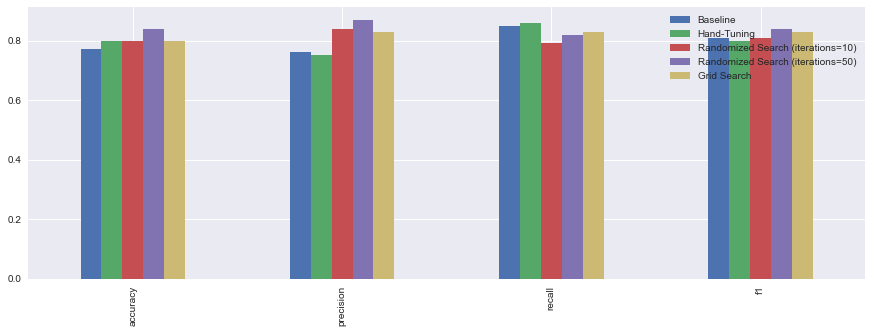

In [37]:
# Comparing all models
plt.style.use("seaborn")
compare_metrics=pd.DataFrame({"Baseline": actual_baseline_metrics,
                            "Hand-Tuning":model2,
                            "Randomized Search (iterations=10)": rs_clf_1,
                            "Randomized Search (iterations=50)":rs_clf_2,
                            "Grid Search":gs_preds})
compare_metrics.plot.bar(figsize=(15,5));

### Whenever comparing models, always make sure to train the models on same data and have predictions also done on same test data 

## Saving Trained model
* With Python's `pickle` module
* With `joblib` module

**Pickle**

In [42]:
import pickle
pickle.dump(rs_clf_2,open("Randomized_CV_Iterations_50.pkl","wb"))

In [43]:
# Loading a pickle file
loaded_model=pickle.load(open("Randomized_CV_Iterations_50.pkl","rb"))

**Joblib**

In [40]:
from joblib import dump,load

dump(rs_clf_2,filename="Randomized_CV_Iterations_50.joblib")

['Randomized_CV_Iterations_50.joblib']

In [41]:
# Import 
loaded_model=load(filename="Randomized_CV_Iterations_50.joblib")